In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv('dados/dados.csv')

In [5]:
#DataFrame de exemplo:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


#  Média

In [10]:
df['Fulano'].mean()

7.714285714285714

In [11]:
#Agrupando por categoria
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


In [14]:
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

## Mediana

In [20]:
dados['Renda'].median()

1200.0

In [21]:
dados['Renda'].quantile() #Seleciona a medida que separa os (n*100)% menores valores da variável do resto, sendo n o argumento, o default é .5

1200.0

# Moda

In [24]:
dados['Cor'].mode() # 8 Corresponde a pardo

0    8
Name: Cor, dtype: int64

## Relação entre Média, Mediana e Moda

### Usamos para realizar a análise de simetria da distribução, segundo a imagem:

<img src="simetria.png" width=90%>

In [26]:
import seaborn as sns

/tmp/ipykernel_39923/2984072715.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Renda'])


NameError: name 'figure' is not defined

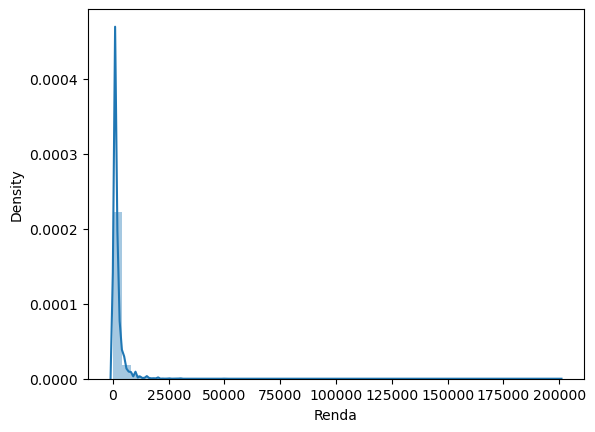

In [27]:
ax = sns.distplot(dados['Renda'])
ax = figure.set_size_inches(12, 6)
ax

/tmp/ipykernel_39923/2556590745.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 20000').Renda)


<Axes: xlabel='Renda', ylabel='Density'>

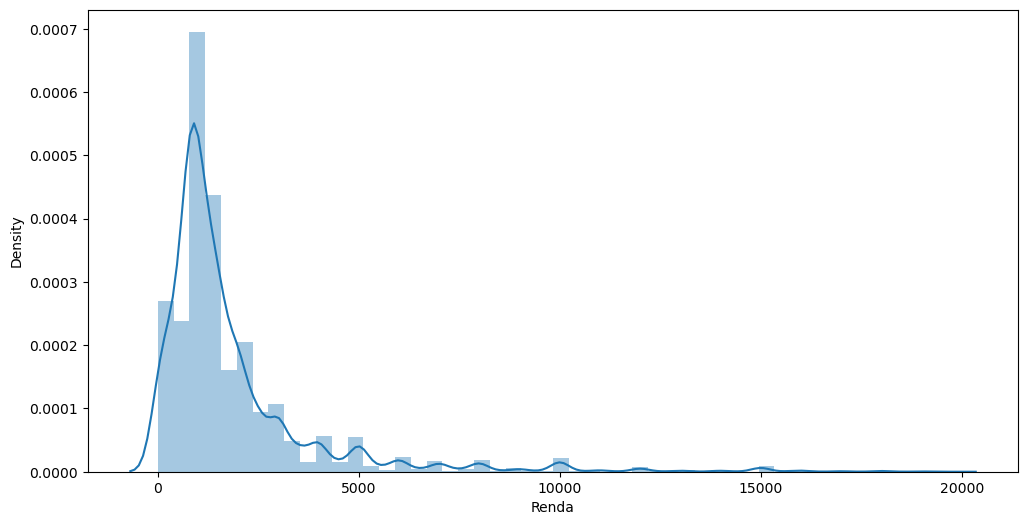

In [28]:
#Queremos cortar os valores mais altos para visualizarmos melhor o gráfico
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

In [30]:
#Aparenta sem assimétrico à direita, mas podemos verificar a condição Média > Mediana > Moda
media = dados['Renda'].mean()
mediana = dados['Renda'].median()
moda = dados['Renda'].mode()

In [35]:
media > mediana > moda # True, portanto é assimétrico à direita

0    True
Name: Renda, dtype: bool

/tmp/ipykernel_39923/3762387715.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


NameError: name 'figure' is not defined

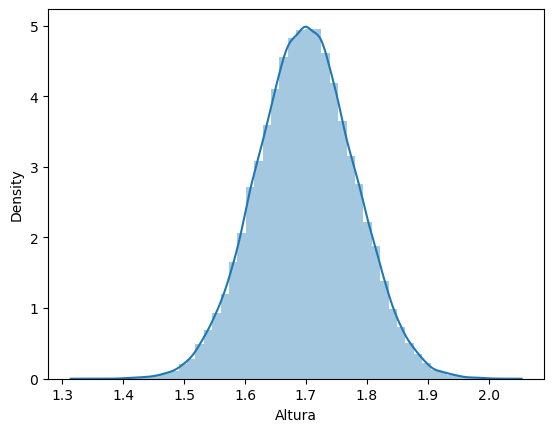

In [36]:
ax = sns.distplot(dados.Altura)
ax = figure.set_size_inches(12, 6)
ax

In [37]:
Moda = dados.Altura.mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [38]:
Mediana = dados.Altura.median()
Mediana

1.6993247325

In [39]:
Media = dados.Altura.mean()
Media #Notamos que eles são proximadamente simétricos

1.6995124540575741

/tmp/ipykernel_39923/959165928.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Anos de Estudo'], bins = 17)


NameError: name 'figure' is not defined

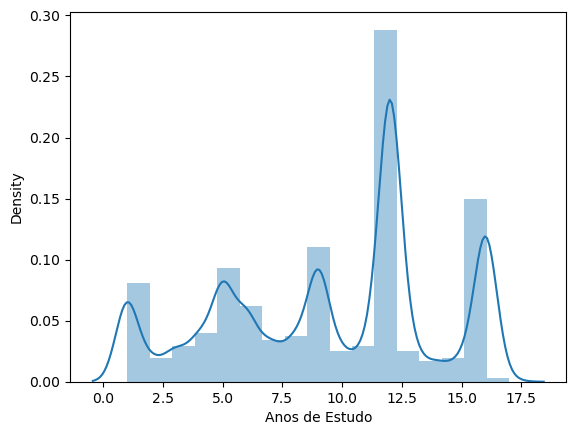

In [40]:
ax = sns.distplot(dados['Anos de Estudo'], bins = 17)
ax = figure.set_size_inches(12, 6)
ax

### O gráfico acima é ambíguo, portanto a análise de desigualdades entre moda, média e mediana se torna mais relevante

In [41]:
Moda = dados['Anos de Estudo'].mode()
Moda

0    12
Name: Anos de Estudo, dtype: int64

In [42]:
Mediana = dados['Anos de Estudo'].median()
Mediana

11.0

In [43]:
Media = dados['Anos de Estudo'].mean()
Media

9.469664237376367

In [45]:
Moda[0] > Mediana > Media # True, portanto assimétrico à esquerda

True